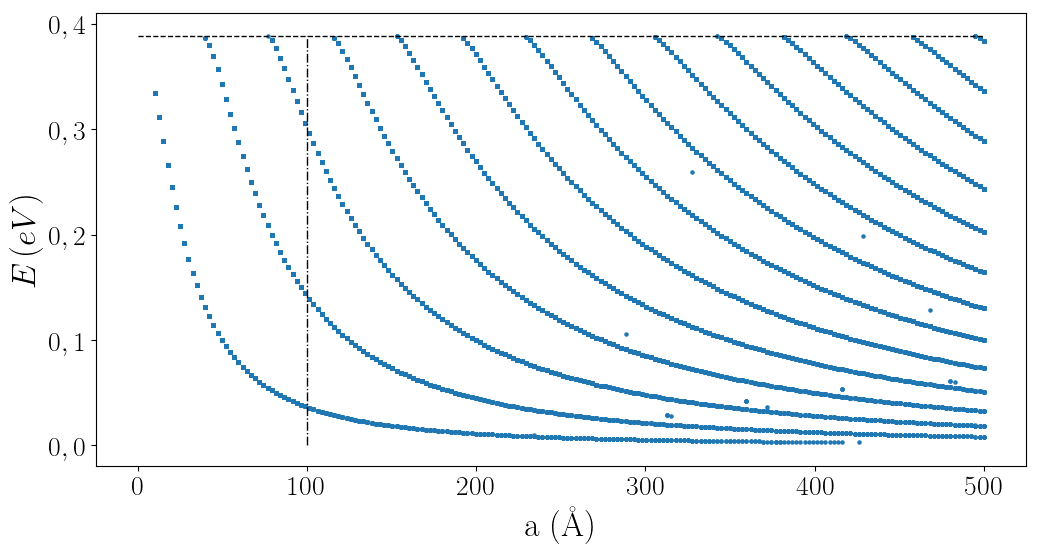

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
import scipy.constants as cte
from scipy.sparse import diags
from scipy.linalg import inv
from scipy.fftpack import fft, ifft, fftfreq
import scipy.special as sp
from scipy.signal import gaussian
from scipy.stats import norm, skewnorm
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# matplotlib default config
import locale
locale.setlocale(locale.LC_NUMERIC, "pt_BR.UTF-8")
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['scatter.marker'] = '.'
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "computer modern sans serif"
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.unicode']=True
df = pd.read_csv('analytic_quantum_well.csv')
ax = df.plot(x='a', y='E', kind='scatter')
ax.set_xlabel("a (\AA)", fontsize=24, fontweight='bold')
ax.set_ylabel(r'$E \, (eV)$', fontsize=24, fontweight='bold')
plt.plot([0, 500], [0.388, 0.388], color='k', linestyle='--', linewidth=1)
plt.plot([100, 100], [0, 0.388], color='k', linestyle='-.', linewidth=1)
plt.savefig('autoestados_poco_quantico.png', bbox_inches='tight')

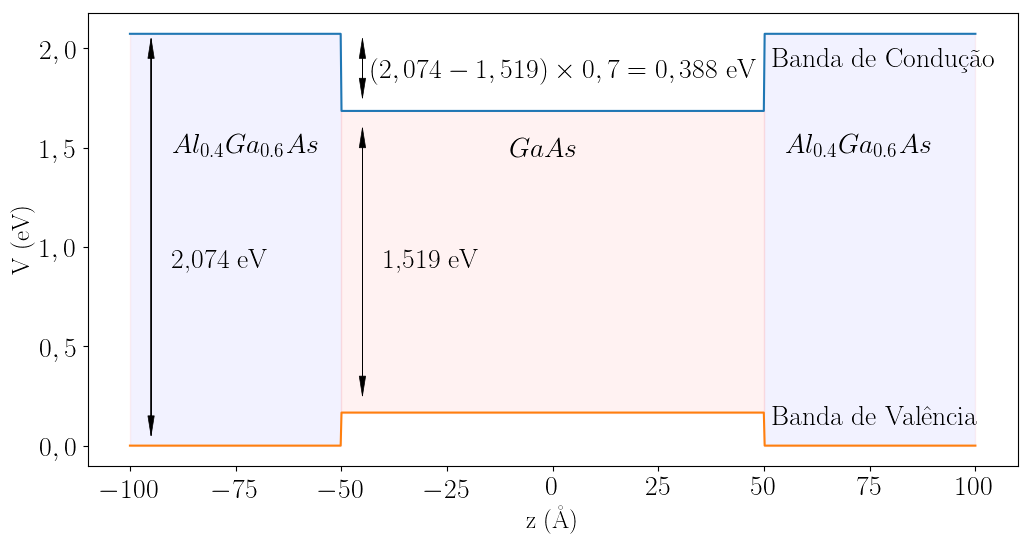

In [126]:
eg=lambda x:(1.519+1.447*x-0.15*x**2)
ch = eg(0.4)-(eg(0.4)-eg(0.0))*0.7
vh = (eg(0.4)-eg(0.0))*0.3
z=np.linspace(-100,100,1000)
vc=np.vectorize(lambda x:eg(0.4) if np.abs(x) > 50 else eg(0.4)-(eg(0.4)-eg(0.0))*0.7 )(z)
vv=np.vectorize(lambda x:    0.0 if np.abs(x) > 50 else (eg(0.4)-eg(0.0))*0.3)(z)
fig, ax = plt.subplots()
ax.plot(z,vc)
ax.plot(z,vv)
ax.set_xlabel('z (\AA)')
ax.set_ylabel('V (eV)')
ax.arrow(-95, 0.05, 0, 2.0, head_width=1.5, head_length=0.1, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.arrow(-95, 2.05, 0, -2.0, head_width=1.5, head_length=0.1, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.text(-90,0.9,"2,074 eV")
ax.arrow(-45, 0.25, 0, 1.35, head_width=1.5, head_length=0.1, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.arrow(-45, 1.60, 0, -1.35, head_width=1.5, head_length=0.1, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.text(-40,0.9,"1,519 eV")
ax.arrow(-45, 1.75, 0, 0.3, head_width=1.5, head_length=0.1, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.arrow(-45, 2.05, 0, -0.3, head_width=1.5, head_length=0.1, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.text(-43,1.85,r"$(2,074-1,519) \times 0,7= 0,388$ eV")
ax.text(52,1.9,r"Banda de Condução")
ax.text(52,0.1,r"Banda de Valência")
ax.fill([-100,-50,-50,-100], [0,0,eg(0.4),eg(0.4)], 'b', alpha=0.05, edgecolor='r')
ax.fill([-50,50,50,-50], [vh,vh,ch,ch], 'r', alpha=0.05, edgecolor='r')
ax.fill([50,100,100,50], [0,0,eg(0.4),eg(0.4)], 'b', alpha=0.05, edgecolor='r')
ax.text(-90,1.45,"$Al_{0.4}Ga_{0.6}As$")
ax.text(-10,1.45,"$GaAs$")
ax.text(55,1.45,"$Al_{0.4}Ga_{0.6}As$")
plt.savefig('poco_quantico_completo.png', bbox_inches='tight')

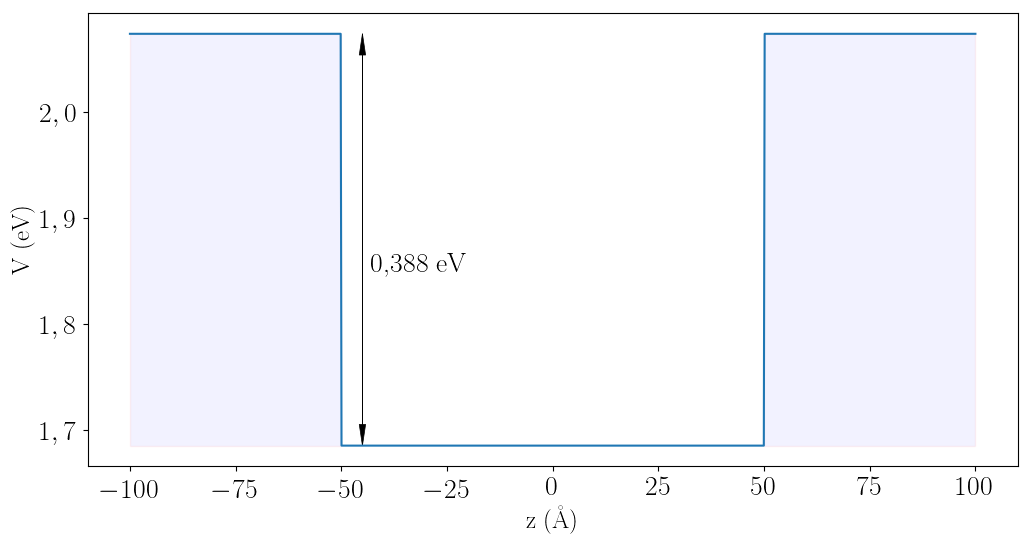

In [138]:
eg=lambda x:(1.519+1.447*x-0.15*x**2)
z=np.linspace(-100,100,1000)
ch = eg(0.4)-(eg(0.4)-eg(0.0))*0.7
vc=np.vectorize(lambda x:eg(0.4) if np.abs(x) > 50 else eg(0.4)-(eg(0.4)-eg(0.0))*0.7 )(z)
fig, ax = plt.subplots()
ax.plot(z,vc)
ax.set_xlabel('z (\AA)')
ax.set_ylabel('V (eV)')
ax.fill([-100,-50,-50,-100], [ch,ch,eg(0.4),eg(0.4)], 'b', alpha=0.05, edgecolor='r')
ax.fill([50, 100,100,50], [ch,ch,eg(0.4),eg(0.4)], 'b', alpha=0.05, edgecolor='r')

ax.arrow(-45, ch, 0, eg(0.4)-ch, head_width=1.5, head_length=0.02, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.arrow(-45, eg(0.4), 0, ch-eg(0.4), head_width=1.5, head_length=0.02, fc='k', ec='k', lw=0.5, length_includes_head=True)
ax.text(-43,1.85,r"0,388 eV")

plt.savefig('poco_quantico_conducao.png', bbox_inches='tight')

# Oscilador harmônico quântico

In [2]:
n = 6
files = np.load('res_numeric_iter.npz')
res_numeric_iter = files['arr_0']
files = np.load('res_numeric_time_3_720.npz')
res_numeric_time = files['arr_0']

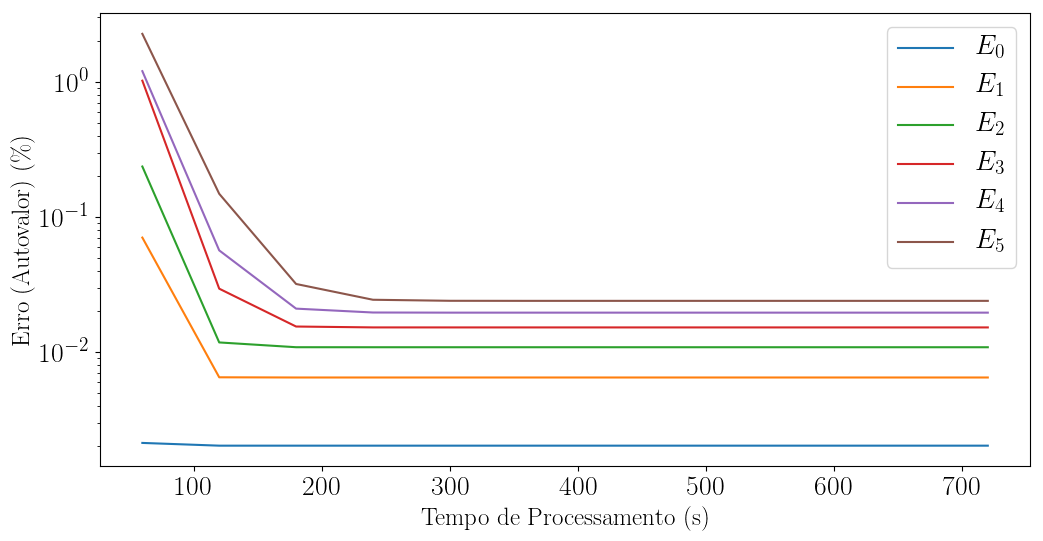

In [27]:
fig, ax = plt.subplots()
for j in range(n):
    sqeuclidean = []
    for res in res_numeric_time:
        sqeuclidean.append(100*res['precisions'][j])
    ax.semilogy([60 * i for i in range(1,13)], sqeuclidean, label=r'$E_{%d}$' % j)
    
ax.set_xlabel('Tempo de Processamento (s)')
ax.set_ylabel('Erro (Autovalor) (\%)')
ax.legend()
#plt.show()
plt.savefig('oscilador_harmonico_tempo_autovalor.png', bbox_inches='tight')

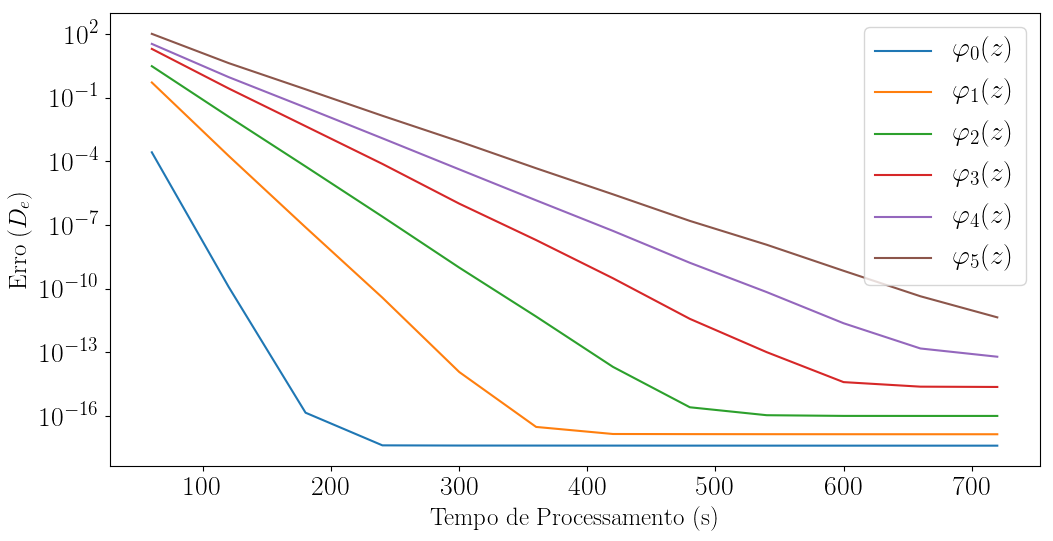

In [50]:
fig, ax = plt.subplots()
for j in range(n):
    sqeuclidean = []
    for res in res_numeric_time:
        sqeuclidean.append(100*res['sqeuclidean'][j])
    ax.semilogy([60 * i for i in range(1,13)], sqeuclidean, label=r'$\varphi_{%d}(z)$' % j)
    
ax.set_xlabel('Tempo de Processamento (s)')
ax.set_ylabel('Erro ($D_e$)')
ax.legend()
#plt.show()
plt.savefig('oscilador_harmonico_tempo_autovetor.png', bbox_inches='tight')

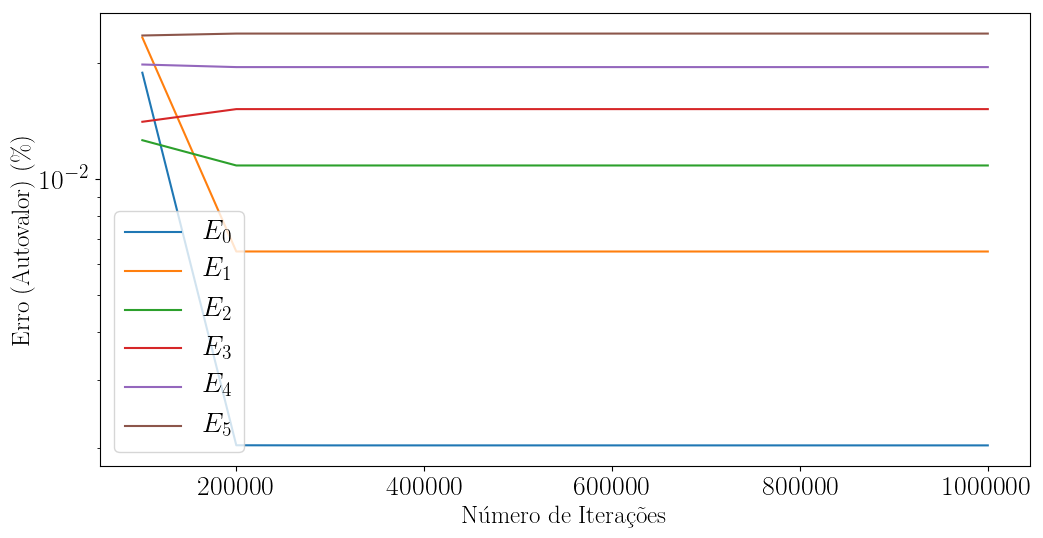

In [31]:
fig, ax = plt.subplots()
for j in range(n):
    precisions = []
    for res in res_numeric_iter:
        precisions.append(100*res['precisions'][j])
    ax.semilogy([i * 1e5 for i in range(1,11)], precisions, label=r'$E_{%d}$' % j)
    
ax.set_xlabel('Número de Iterações')
ax.set_ylabel('Erro (Autovalor) (\%)')
ax.legend()
#plt.show()
plt.savefig('oscilador_harmonico_iter_autovalor.png', bbox_inches='tight')

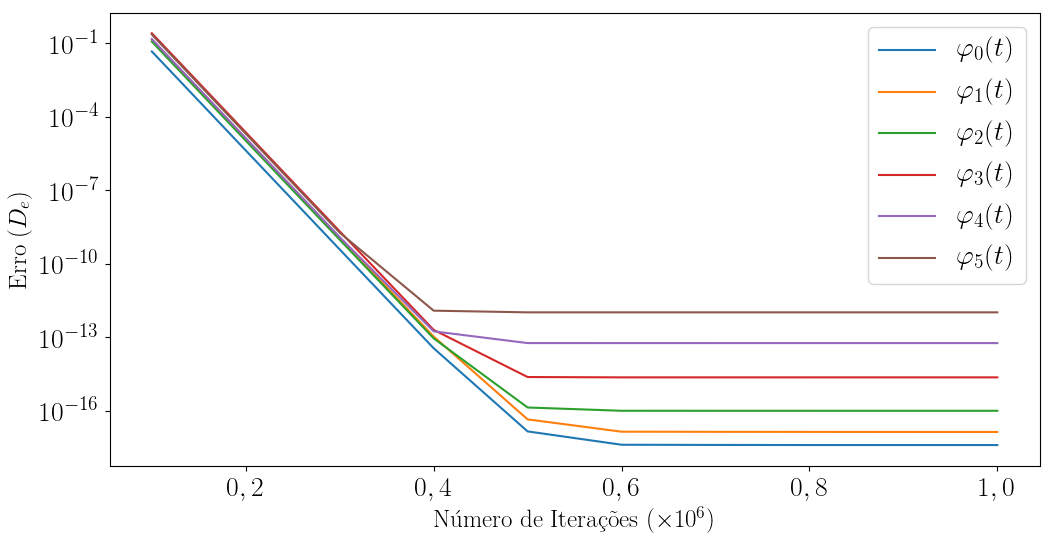

In [51]:
fig, ax = plt.subplots()
for j in range(n):
    sqeuclidean = []
    for res in res_numeric_iter:
        sqeuclidean.append(100*res['sqeuclidean'][j])
    ax.semilogy([i /10 for i in range(1,11)], sqeuclidean, label=r'$\varphi_{%d} (t)$' % j)
    
ax.set_xlabel(r'Número de Iterações ($\times 10^6$)')
ax.set_ylabel('Erro ($D_e$)')
#ax.ticklabel_format(style='sci', axis='x', scilimits=(1,1))
ax.legend()
#plt.show()
plt.savefig('oscilador_harmonico_iter_autovetor.png', bbox_inches='tight')

In [53]:
# grandezas de interesse em unidades atomicas
au_l = cte.value('atomic unit of length')
au_t = cte.value('atomic unit of time')
au_e = cte.value('atomic unit of energy')

# outras relacoes de interesse
ev = cte.value('electron volt')
c = cte.value('speed of light in vacuum')
hbar_si = cte.value('Planck constant over 2 pi')
me = cte.value('electron mass')
au2ang = au_l / 1e-10
au2ev = au_e / ev

# constantes do problema
E0 = 150.0 # eV
delta_x = 5.0 # angstron
x0 = -30.0 # angstron
xf = -40.0 # angstron
l = 8.1e-6 # m

# otimizando
L = 100 # angstron
N = 2048
hN = int(N/2)
dt = 1e-19 # s

# unidades atomicas
L_au = L / au2ang
dt_au = -1j * dt / au_t
E0_au = E0 / au2ev
delta_x_au = delta_x / au2ang
x0_au = x0 / au2ang
xf_au = xf / au2ang
k0_au = np.sqrt(2 * E0_au)

# malhas direta e reciproca
dx = L / (N-1)
x_au = np.linspace(-L_au/2.0, L_au/2.0, N)
dx_au = np.abs(x_au[1] - x_au[0])
k_au = fftfreq(N, d=dx_au)

# 
f = c / l # Hz
w = 2.0 * np.pi * f
x_m = np.linspace(-(L/2) * 1e-10, (L/2) * 1e-10, N)
v_j = 0.5 * me * x_m**2 * w**2
x_nm = x_m / 1e-9
v_ev = v_j / ev
v_au = v_ev / au2ev

# split step
exp_v2 = np.exp(- 0.5j * v_au * dt_au)
exp_t = np.exp(- 0.5j * (2 * np.pi * k_au) ** 2 * dt_au)
propagador = lambda p: exp_v2 * ifft(exp_t * fft(exp_v2 * p))
propagador_titulo = "Split-Step"

# chutes iniciais
n = 6
short_grid = np.linspace(-1, 1, N)
g = gaussian(N, std=int(N/100))
estados = np.array([g * sp.legendre(i)(short_grid) for i in range(n)],dtype=np.complex_)
valores = np.zeros(n)
contadores = np.zeros(n)

valores_analiticos_si = [hbar_si * w * (i + 0.5) for i in range(n)]
valores_analiticos_ev = np.array(valores_analiticos_si) / ev

texto_x_l = -L/2
texto_x_r = 0.7 * L/2

for s in range(n):
    while True:
        estados[s] = propagador(estados[s])
        contadores[s] += 1
        
        # gram-shimdt
        for m in range(s):
            proj = simps(estados[s] * np.conjugate(estados[m]), x_au)
            estados[s] -= proj * estados[m]
            
        # normaliza
        A = np.sqrt(simps(np.abs(estados[s])**2, x_au))
        estados[s] /= np.sqrt(simps(np.abs(estados[s])**2, x_au))
        
        if contadores[s] % 1000 == 0:
            derivada2 = (estados[s][:-2] - 2 * estados[s][1:-1] + estados[s][2:]) / dx_au**2
            psi = estados[s][1:-1]
            psi_conj = np.conjugate(psi)
            p_h_p = simps(psi_conj * (-0.5 * derivada2 + v_au[1:-1] * psi), x_au[1:-1])
            p_h_p /= A
            valores[s] = p_h_p.real * au2ev # eV
            if np.abs(1-valores[s]/valores_analiticos_ev[s]) < 0.0001:
                print("%.4e / %.4e" % (valores[s], valores_analiticos_ev[s]))
                break

7.6541e-02 / 7.6533e-02
2.2962e-01 / 2.2960e-01
3.8270e-01 / 3.8267e-01
5.3579e-01 / 5.3573e-01
6.8887e-01 / 6.8880e-01
8.4195e-01 / 8.4187e-01


/home/euzi/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


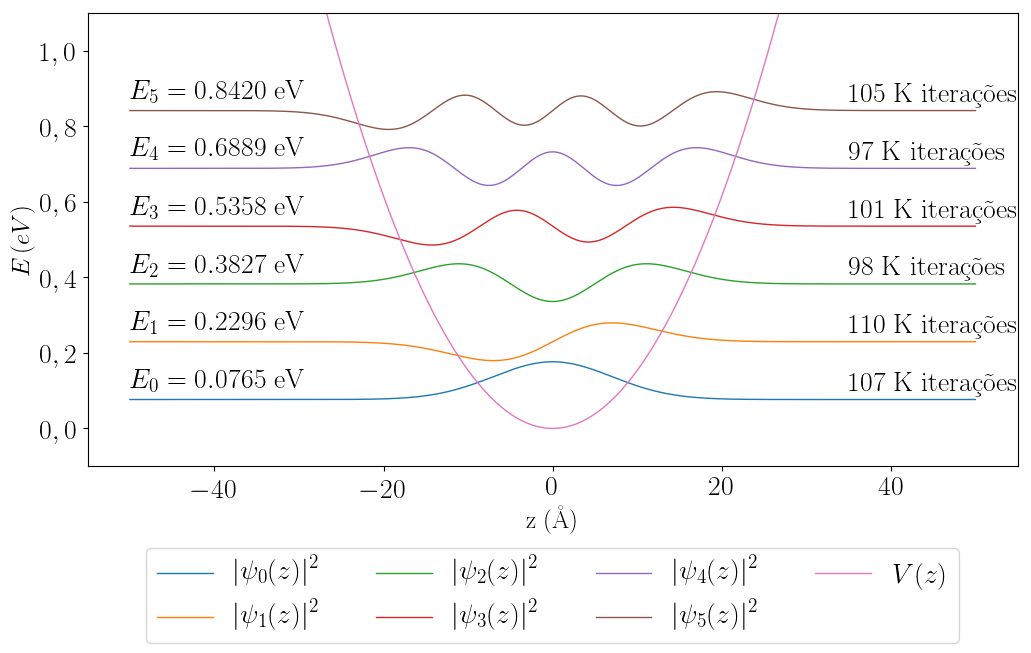

In [85]:
# especificos do grafico
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([-0.1,1.1])
plt.xlabel("z (\AA)")
plt.ylabel(r'$E \, (eV)$')
psif = [0.1 * estados[m]/np.ptp(estados[m]) + valores[m] for m in range(s+1)]
lines = []
for i, p in enumerate(psif):
    line, = plt.plot(x_au * au2ang, p, lw=1.0, label=r'$|\psi_{%d} (z)|^2$' % i)
    lines.append(line)
    ax.text(texto_x_l, valores[i] + 0.02, r"$E_{%d} = %.4f$ eV" % (i, valores[i]))
    ax.text(texto_x_r, valores[i] + 0.02, r"$%d$ K iterações" % int(contadores[i]/1000))

linev, = plt.plot(x_au * au2ang, v_au * au2ev, lw=1.0, label='$V(z)$')
lines.append(linev)
plt.legend(handles=lines, loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
#plt.show()
plt.savefig('oscilador_harmonico_autoestados_autovalores.png', bbox_inches='tight')

# Onda Plana

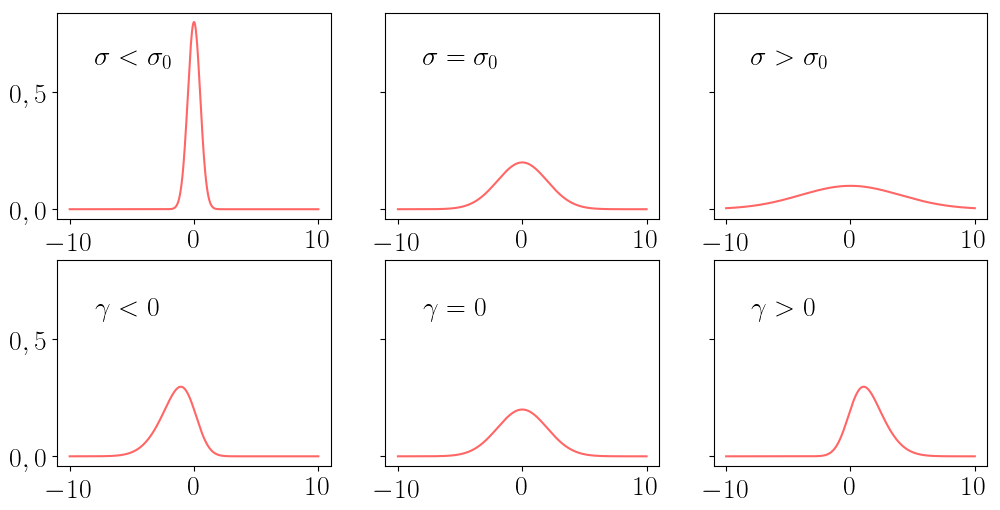

In [4]:
x = np.linspace(-10, 10, 1000)
df = pd.DataFrame({
    'x':x,
    'low_standard_deviation': norm.pdf(x, loc=0, scale=0.5),
    'normal_standard_deviation': norm.pdf(x, loc=0, scale=2.0),
    'high_standard_deviation': norm.pdf(x, loc=0, scale=4.0),
    'negative_skewness': skewnorm.pdf(x, -2, loc=0, scale=2.0),
    'zero_snewness': skewnorm.pdf(x, 0, loc=0, scale=2.0),
    'positive_skewness': skewnorm.pdf(x, 2, loc=0, scale=2.0)
})
#df.to_csv('comparacao_desvio_padrao_obliquidade.csv')
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True)
mean, var, skew, kurt = norm.stats(moments='mvsk')
ax1.plot(x, norm.pdf(x, loc=0, scale=0.5), 'r-', alpha=0.6, label='norm pdf')
ax1.text(-8, 0.6, r"$\sigma < \sigma_0$")
ax2.plot(x, norm.pdf(x, loc=0, scale=2.0), 'r-', alpha=0.6, label='norm pdf')
ax2.text(-8, 0.6, r"$\sigma = \sigma_0$")
ax3.plot(x, norm.pdf(x, loc=0, scale=4.0), 'r-', alpha=0.6, label='norm pdf')
ax3.text(-8, 0.6, r"$\sigma > \sigma_0$")

ax4.plot(x, skewnorm.pdf(x, -2, loc=0, scale=2.0), 'r-', alpha=0.6, label='norm pdf')
ax4.text(-8, 0.6, r"$\gamma < 0$")
ax5.plot(x, skewnorm.pdf(x, 0, loc=0, scale=2.0), 'r-', alpha=0.6, label='norm pdf')
ax5.text(-8, 0.6, r"$\gamma = 0$")
ax6.plot(x, skewnorm.pdf(x, 2, loc=0, scale=2.0), 'r-', alpha=0.6, label='norm pdf')
ax6.text(-8, 0.6, r"$\gamma > 0$")
plt.savefig('comparacao_desvpad_obliquidade.png', bbox_inches='tight')

In [5]:
pe = pd.read_csv('onda_plana_pseudo_analitica_resultados_pe.csv')
rk = pd.read_csv('onda_plana_pseudo_analitica_resultados_rk.csv')
cn = pd.read_csv('onda_plana_pseudo_analitica_resultados_cn.csv')

In [8]:
pec = pe.copy()
rkc = rk.copy()
cnc = cn.copy()

scaler = StandardScaler()
cols = ['stdvar', 'skew', 'a', 'stdvar_real', 'skew_real', 'a_real']

pec[cols] = scaler.fit_transform(pec[cols])
rkc[cols] = scaler.fit_transform(rkc[cols])
cnc[cols] = scaler.fit_transform(cnc[cols])

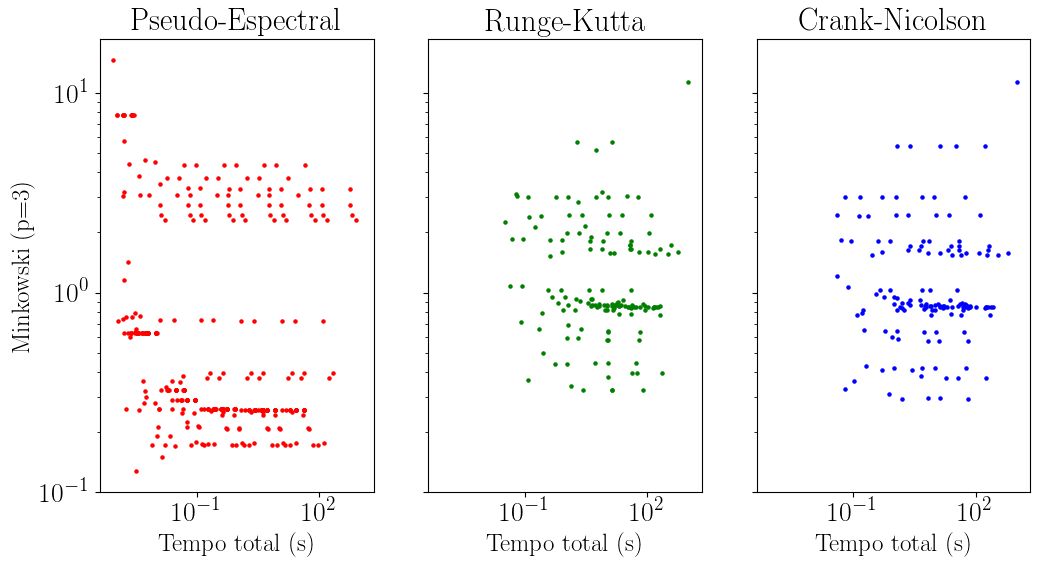

In [10]:
p = 3
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True);

with pd.plotting.plot_params.use('x_compat', True):
    pec['minkowski'] = pec.apply(lambda l: cdist(XA=[[l.a,l['stdvar'],l['skew']]], XB=[[l.a_real,l.stdvar_real,l.skew_real]], metric='minkowski', p=p)[0][0], axis=1)
    pec.plot(x='program_time', y='minkowski', kind='scatter', loglog=True, color='r', ax=ax1, sharex=True, sharey=True)

    rkc['minkowski'] = rkc.apply(lambda l: cdist(XA=[[l.a,l['stdvar'],l['skew']]], XB=[[l.a_real,l.stdvar_real,l.skew_real]], metric='minkowski', p=p)[0][0], axis=1)
    rkc.plot(x='program_time', y='minkowski', kind='scatter', loglog=True, color='g', ax=ax2, sharex=True, sharey=True)

    cnc['minkowski'] = cnc.apply(lambda l: cdist(XA=[[l.a,l['stdvar'],l['skew']]], XB=[[l.a_real,l.stdvar_real,l.skew_real]], metric='minkowski', p=p)[0][0], axis=1)
    cnc.plot(x='program_time', y='minkowski', kind='scatter', loglog=True, color='b', ax=ax3, sharex=True, sharey=True)

ax1.title.set_text('Pseudo-Espectral')
ax2.title.set_text('Runge-Kutta')
ax3.title.set_text('Crank-Nicolson')
ax1.set_ylabel('Minkowski (p=3)')
ax2.set_ylabel('Minkowski (p=3)')
ax3.set_ylabel('Minkowski (p=3)')
ax1.set_xlabel('Tempo total (s)')
ax2.set_xlabel('Tempo total (s)')
ax3.set_xlabel('Tempo total (s)')

# plt.show()
plt.savefig('onda_plana_comparacao_minkowski.png', bbox_inches='tight')
# print(cnc.loc[(cnc['program_time'] < 0.1) & (cnc['minkowski'] < 1)].shape[0]/cnc.shape[0])
# print(rkc.loc[(rkc['program_time'] < 0.1) & (rkc['minkowski'] < 1)].shape[0]/rkc.shape[0])
# print(pec.loc[(pec['program_time'] < 0.1) & (pec['minkowski'] < 1)].shape[0]/pec.shape[0])